***
# <center> Lecture--13 "Data Mining, Machine Learning and Deep Learning"
***

## Exercise Q1: Apply CNN for MNIST

- Build your own CNN from scratch and try to achieve the highest possible accuracy on MNIST. The model should use 2 convolutional layers, followed by 1 pooling layer, then dropout 25%, then a dense layer, another dropout layer but with 50% dropout, and finally the output layer. It should reache more than 90% accuracy on the test set.

In [ ]:
import sys
import sklearn
import tensorflow as tf
from tensorflow import keras
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

# to make this notebook's output stable across runs
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
# Given: Load the data and seperate
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()
X_train_full = X_train_full / 255.
X_test = X_test / 255.
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

X_train = X_train[..., np.newaxis]
X_valid = X_valid[..., np.newaxis]
X_test = X_test[..., np.newaxis]

In [ ]:
# [TODO] Build your CNN based on the above instruction
# [Hints] Before Dropout apply ReLU and after apply softmax
# [Hins] You should also use sparse categorical cross-entropy as loss function and "nadam" optimizer="nadam" with 10 epochs
keras.backend.clear_session()

model = keras.models.Sequential([
    keras.layers.Conv2D(32, kernel_size=3, padding="same", activation="relu"),
    keras.layers.Conv2D(64, kernel_size=3, padding="same", activation="relu"),
    keras.layers.MaxPool2D(),
    keras.layers.Flatten(),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam",
              metrics=["accuracy"])

model.fit(X_train, y_train, epochs=10, validation_data=[X_valid, y_valid])
model.evaluate(X_test, y_test)

## Exercise Q2: Image Classification Using convolution kernel: classify cats or dogs from images

- Build the model
    - Model consists of three convolution blocks with a max pool layer in each of them. There's a fully connected layer with 512 units on top of it that is activated by a `relu` activation function.
    - Choose the ADAM optimizer and binary cross entropy loss function.
- Train the model
    - Parameters for pre-processing the dataset and training the network: batch_size = 128, epochs = 15, image height = 150, image width = 150 

- [Hints] 
    - Builds an image classifier using a `tf.keras.Sequential` model and load data using `tf.keras.preprocessing.image.ImageDataGenerator`. 
    - Building _data input pipelines_ using the `tf.keras.preprocessing.image.ImageDataGenerator` class to efficiently work with data to use with the model.

In [1]:
#  Src TensorFlow.org
import os
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# Load data: from <a href="https://www.kaggle.com/c/dogs-vs-cats/data" target="_blank">Dogs vs Cats</a> dataset from Kaggle. 
# Download the archive version of the dataset and store it in the "/tmp/" directory.

_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)

PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

In [3]:
# [TODO] After extracting its contents, assign variables with the proper file path for the training and validation set.
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

In [4]:
train_cats_dir = os.path.join(train_dir, 'cats')  # directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')  # directory with our training dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')  # directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  # directory with our validation dog pictures

In [5]:
# [TODO] understand the data: look at how many cats and dogs images are in the training and validation directory:

num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val


print('total training cat images:', num_cats_tr)
print('total training dog images:', num_dogs_tr)

print('total validation cat images:', num_cats_val)
print('total validation dog images:', num_dogs_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
--
Total training images: 2000
Total validation images: 1000


In [6]:
# [TODO], set up variables to use while pre-processing the dataset and training the network.
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [7]:
# Data preparation: Format the images into appropriately pre-processed floating point tensors before feeding to the network:

# 1. Read images from the disk.
# 2. Decode contents of these images and convert it into proper grid format as per their RGB content.
# 3. Convert them into floating point tensors.
# 4. Rescale the tensors from values between 0 and 255 to values between 0 and 1, as neural networks prefer to deal with small input values.
# Use `ImageDataGenerator` class provided by `tf.keras` for all 4 steps.


train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data

In [8]:
# [TODO] After defining the generators for training and validation images, the `flow_from_directory` method load images 
# from the disk, applies rescaling, and resizes the images into the required dimensions.

# training
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

# validation
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [9]:
# [TODO] Visualize the training images by extracting a batch of images from the training 
# generator—which is 32 images in this example—then plot five of them with `matplotlib`.

# [Hints] The `next` function returns a batch from the dataset. 
# The return value of `next` function is in form of `(x_train, y_train)` 
# Discard the labels to only visualize the training images.

sample_training_images, _ = next(train_data_gen)

In [10]:
# [TODO] Plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

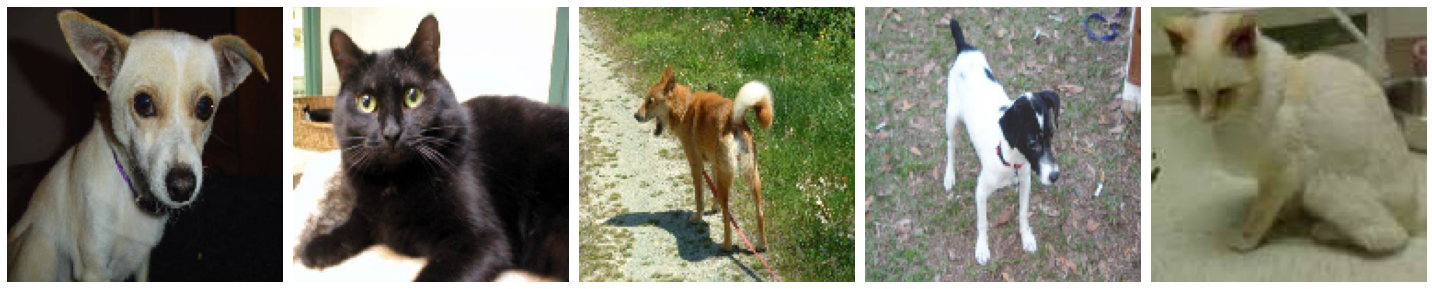

In [11]:
plotImages(sample_training_images[:5])

In [12]:
# [TODO] Create the model
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1)
])

In [13]:
# [TODO] Compile the model: *ADAM* optimizer and *binary cross entropy* loss function. 
# view training and validation accuracy for each training epoch, pass the `metrics` argument.
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [14]:
# [TODO] View all the layers of the network using the model's `summary` method:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 18, 18, 64)       0

In [15]:
# [TODO] Use the `fit_generator` method of the `ImageDataGenerator` class to train the network.

history = model.fit(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

Epoch 1/15
15/15 [==============================] - 19s 1s/step - loss: 1.0528 - accuracy: 0.5128 - val_loss: 0.6908 - val_accuracy: 0.5100
Epoch 2/15
15/15 [==============================] - 22s 1s/step - loss: 0.6864 - accuracy: 0.4979 - val_loss: 0.6778 - val_accuracy: 0.5045
Epoch 3/15
15/15 [==============================] - 21s 1s/step - loss: 0.6632 - accuracy: 0.5379 - val_loss: 0.6547 - val_accuracy: 0.5212
Epoch 4/15
15/15 [==============================] - 29s 2s/step - loss: 0.6145 - accuracy: 0.6266 - val_loss: 0.6018 - val_accuracy: 0.6339
Epoch 5/15
15/15 [==============================] - 24s 2s/step - loss: 0.5937 - accuracy: 0.6597 - val_loss: 0.6226 - val_accuracy: 0.5737
Epoch 6/15
15/15 [==============================] - 24s 2s/step - loss: 0.5613 - accuracy: 0.6960 - val_loss: 0.5815 - val_accuracy: 0.7065
Epoch 7/15
15/15 [==============================] - 24s 2s/step - loss: 0.4895 - accuracy: 0.7537 - val_loss: 0.5747 - val_accuracy: 0.6931
Epoch 8/15
15/15 [==

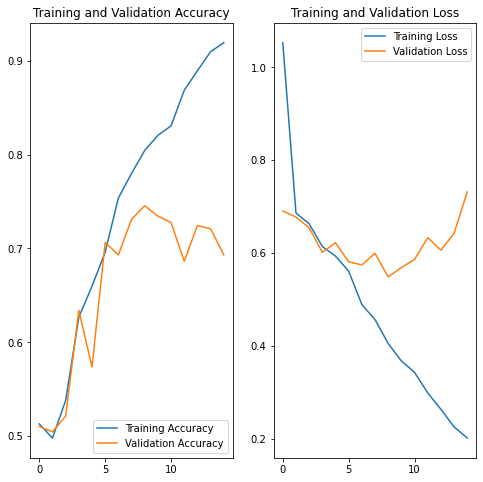

In [16]:
# [TODO] Now visualize the results after training the network.
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

# Plot the figure for Training and Validation Accuracy
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Plot the figure for Training and Validation Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()